In [1]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

%run defs_NN.ipynb

In [93]:
def f(x,sigma):
    # The function to be learned.
    
    return np.sin(2*x)

    
examples = 5000
points_in = 3
divisor = 10.
s=4

np.random.seed(1)
X1 = np.zeros((examples,points_in))
Y1 = np.zeros((examples,points_in))
Z1= np.zeros((examples,1))
    
    
for i in range(examples):
    rand = 20*(np.random.rand()-1)
    X1_temp = 1.*np.arange(points_in).reshape(-1, 1)/divisor+rand
    X1_temp = X1_temp.reshape((points_in,))
    X2_temp = f(X1_temp,s).ravel()+np.random.randn()*0.0
    X2_temp = X2_temp.reshape((points_in,))
    Y1[i,:] = X2_temp
    X1[i,:] = X1_temp
    
    Y1_temp = 1.*(np.arange(1).reshape(-1, 1)+points_in)/divisor+rand
    Y2_temp = (f(Y1_temp,s)-f(Y1_temp-1/divisor,s)).ravel()
    Y2_temp = Y2_temp.reshape((1,))
    Z1[i,:] = Y2_temp
    
X1= X1.T
Y1=Y1.T
Z1=Z1.T


model = Sequential()
model.add(LSTM(4, input_shape=(points_in*2, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(np.concatenate((X1,Y1)).T.reshape((examples,points_in*2,1)), Z1.T, epochs=5, batch_size=1, verbose=2)


Epoch 1/5
 - 76s - loss: 0.0159
Epoch 2/5
 - 71s - loss: 7.3278e-04
Epoch 3/5
 - 74s - loss: 1.3593e-04
Epoch 4/5
 - 77s - loss: 7.0475e-05
Epoch 5/5
 - 69s - loss: 5.7316e-05


In [94]:
para = initialize_parameters_deep_tl((points_in,points_in,points_in),rint=3) 

j2,para_f = mom_grad_desc(Z1,X1,Y1,para,1500,.1,.001)

In [95]:
pred_x = np.arange(100).reshape(-1, 1)/divisor
act_f = f(pred_x,s)
pred_f = 0*np.sin(2 * np.pi * pred_x)
pred_f2 = 0*np.sin(2 * np.pi * pred_x)


for i in range(points_in):
    pred_f[i]=act_f[i]
    pred_f2[i]=act_f[i]
    
Xp = np.concatenate((pred_x,act_f,pred_f,pred_f2),axis=1)

for i in range(Xp.shape[0]-points_in):
    Xp[i+points_in,2]=NN_forward(Xp[i:i+points_in,0].reshape((points_in,1)),Xp[i:i+points_in,2].reshape((points_in,1)),para_f)[0]+Xp[i+points_in-1,2]
    Xp[i+points_in,3]=model.predict(np.concatenate((Xp[i:i+points_in,0],Xp[i:i+points_in,3])).T.reshape((1,points_in*2,1)))+Xp[i+points_in-1,3]

In [96]:
np.savetxt("Xp.csv", Xp, delimiter=",")


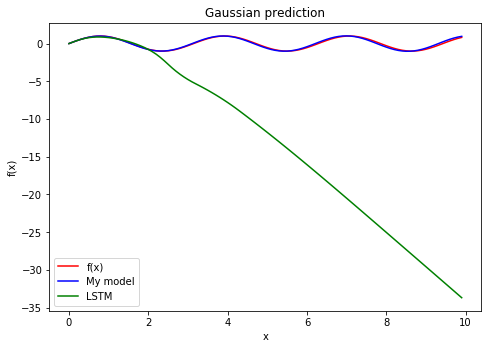

In [98]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(Xp[:,0],Xp[:,1],'r',label = 'f(x)')
ax.plot(Xp[:,0],Xp[:,2],'b',label = 'My model')
ax.plot(Xp[:,0],Xp[:,3],'g',label = 'LSTM')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gaussian prediction')
ax.legend()
plt.show()
